# Monday, October 20th, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Salt and pepper noise

In recent weeks, we've seen how to work with images using NumPy as `(m,n,3)` RGB arrays and visualizing them with `plt.imshow`. The cell below will download an example image file from the course webpage into your Jupyter notebook directory with the file name `noisy_img.png`.

In [2]:
import requests

with open('noisy_img.png','wb') as f:
    data = requests.get(r'https://jllottes.github.io/_images/image_denoising-1.png').content
    f.write(data)

Let's read this image in as a NumPy array using `plt.imread` and plot it using `plt.imshow`:

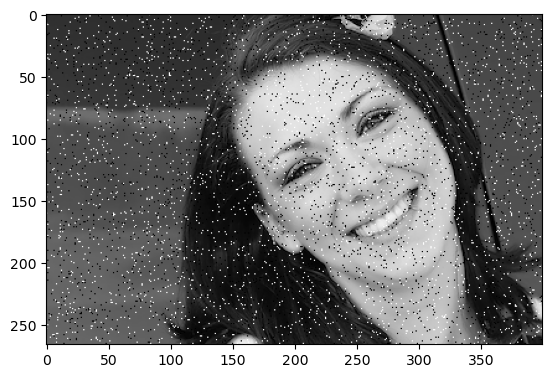

In [3]:
noisy_img = plt.imread('noisy_img.png')
plt.imshow(noisy_img)

Notice that the image looks to have been affected by some kind of noise. In particular, some pixels seem to have mistakenly been colored white, while others have been colored black. Let's take a closer look to see this more clearly.

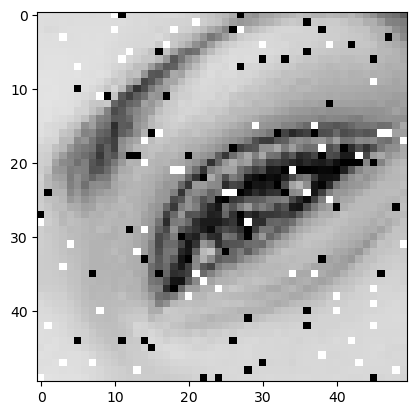

In [4]:
plt.imshow(noisy_img[60:110,235:285])

This type of noise is called *salt and pepper noise*, where some pixels have been replaced with white (salt) pixels and other pixels have been replaced with black (pepper) pixels. For our next project, we are interested in exploring strategies to try to filter and remove this type of noise.

## [Project 4 - Image denoising](https://jllottes.github.io/Projects/image_denoising/image_denoising.html)

In order to explore filtering salt and pepper noise, it's useful to first be able to generate this kind of noise ourselves. That is, it will be helpful to have some Python code that can take an image and randomly assign some pixels to be salt noise and others to be pepper noise.

### Loading in sample images

There are several example images available on the project page that can be used for this exploration. Pick whichever you like, download it, and place it into your Jupyter notebook directory. Then, read it into a NumPy array using `np.imread`.

For example, I've downloaded `circuit.png` into my Jupyter notebook directory. Now, I will read it into a NumPy array:

In [55]:
img = plt.imread('sign.png')

Let's use `plt.imshow` to see what this image looks like.

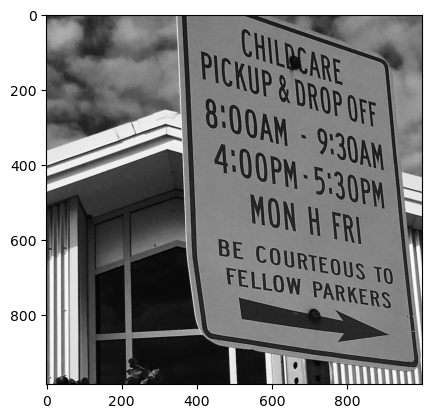

In [56]:
plt.imshow(img)

Before proceeding, let's take a look at the structure of the `img` array. For example, does it contain RGB values or RGBA values (with transparency)? Does it contain floats between `0` and `1` or does it contain integers between `0` and `255`?

In [57]:
print(img.shape)

(984, 1000, 4)


In [58]:
print(img.dtype)

float32


In [59]:
print(img[0,0])

[0.1764706 0.1764706 0.1764706 1.       ]


We see that the `circuit.png` image contains floating point RGB values (without transparency). If your chosen image has a different format, transform it so that it also contains floating point RGB values. As a reminder:
 - `img[:,:,:3]` will produce a slice consisting of only the RGB parts of the image and will drop any transparency information, and
 - `img / 255` produce a floating point RGB array from an integer RGB array.

In [ ]:
img = img[:,:,:3]

### Grayscale images

For this project, we will be working with grayscale images. That is, each image contains only shades of gray.

Note: we get a shade of gray when the red, green, and blue channels match for a given pixel. Let's confirm that our image file contains only gray pixels.

In [11]:
np.min(img[:,:,0] == img[:,:,1])       # Check if red channel equals green channel

np.True_

In [12]:
np.min(img[:,:,0] == img[:,:,2])       # Check if red channel equals blue channel

np.True_

We can represent grayscale images as `(m,n)` arrays (rather than `(m,n,3)`) without any loss of information, since all three color channels give the same `(m,n)` array. In the case of the `img` array, we could take `img[:,:,0]` (the red channel) to represent the grayscale values.

In [13]:
gray_img = img[:,:,0]

Let's confirm that there's no loss of information:

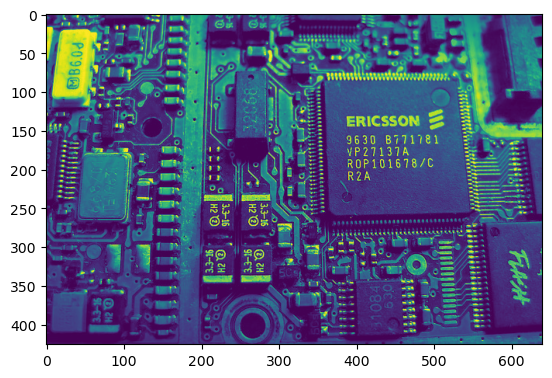

In [14]:
plt.imshow(gray_img)

When `plt.imshow` is passed a grayscale array, it defaults to the `viridis` colormap. Let's override this choice to use the `gray` colormap. It would also be helpful to specify `vmin=0` and `vmax=1` to ensure that `plt.imshow` is correctly assigning colors to the values in the array.

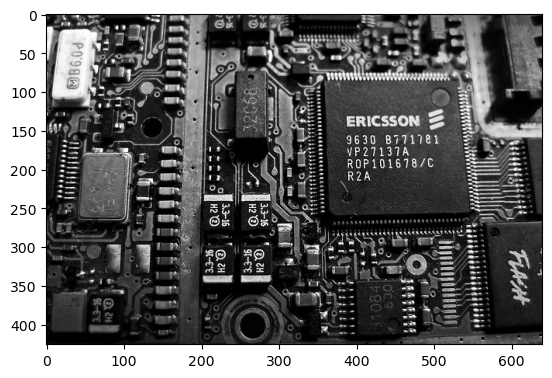

In [15]:
plt.imshow(gray_img, cmap='gray', vmin=0, vmax=1)

What could we do if we started from a color image that we want to convert to a grayscale image, like `mario.png`?

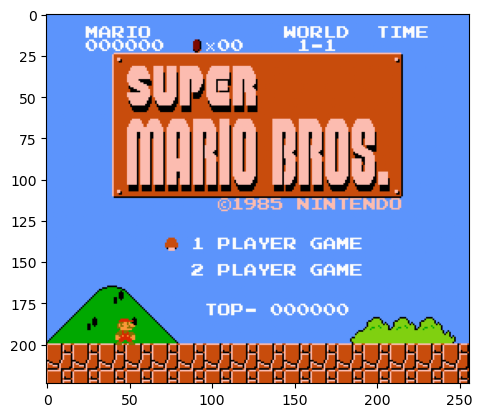

In [16]:
mario = plt.imread('mario.png')
plt.imshow(mario)

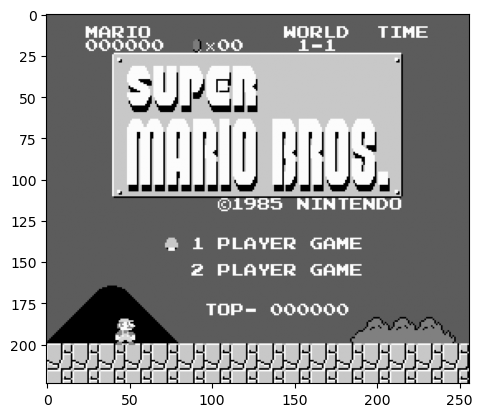

In [20]:
gray_mario = mario[:,:,0]

plt.imshow(gray_mario, cmap='gray', vmin=0, vmax=1)

The `np.mean` method on an array can be used to compute averages.

In [23]:
#help(np.mean)

In [22]:
np.mean(mario)

np.float32(0.67915136)

We can include an optional argument `axis` to specify the dimension through which means should be calculated. In particular, including the argument `axis=2` tells NumPy to compute the average through the color channel only (i.e. axis `2` of the `(m,n,3)` array). In other words, this will average the RGB triple separately for each pixel.

In [24]:
gray_mario = np.mean(mario, axis=2)
print(gray_mario.shape)

(224, 256)


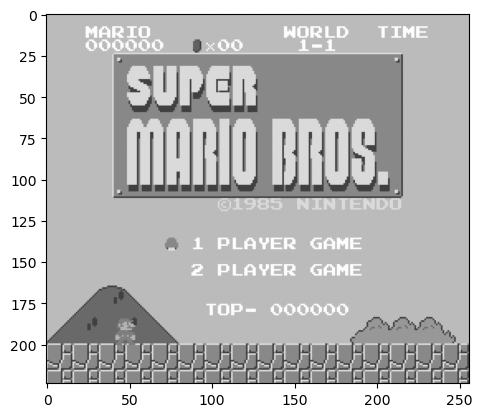

In [25]:
plt.imshow(gray_mario, cmap='gray', vmin=0, vmax=1)

### Adding salt and pepper noise

Before adding noise to our image, let's make a copy of the array to preserve the original image array. Let's call this copy `noisy_img` (we will come back to add noise to this image later).

In [31]:
noisy_img = gray_img.copy()

We would like a method for randomly selecting pixels of the `noisy_img` array to which we can add salt/pepper noise. The `np.random.random` function will be useful for this task, which works as follows:
 - `np.random.random()` will return a randomly selected float in the interval $[0,1)$.
 - `np.random.random(shape)` will return an array with shape `shape`, where each entry contains a randomly selected float in the interval $[0,1)$.

Strategy: let's generate an array of the same shape as our image filled with randomly drawn values between `0` and `1`. If the randomly drawn value is greater than, say `.9`, we'll add salt noise in that position.

In [27]:
np.random.random()

0.11660830530370037

In [28]:
np.random.random((2,3))

array([[0.4338342 , 0.96776245, 0.93078974],
       [0.3726567 , 0.54916202, 0.7229497 ]])

In [32]:
nrows, ncols = noisy_img.shape

random_array = np.random.random((nrows, ncols))

for i in range(nrows):
    for j in range(ncols):
        if random_array[i,j] > .9:
            noisy_img[i,j] = 1


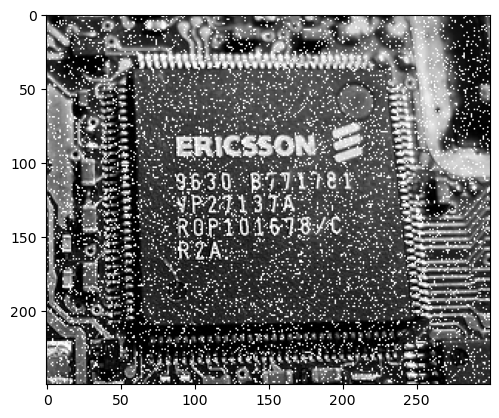

In [34]:
plt.imshow(noisy_img[50:300, 300:600], cmap='gray', vmin=0, vmax=1)

What if we want to add pepper noise as well?

In [45]:
noisy_img = gray_img.copy()

nrows, ncols = noisy_img.shape

random_salt_array = np.random.random((nrows, ncols))
random_pepper_array = np.random.random((nrows, ncols))

for i in range(nrows):
    for j in range(ncols):
        if random_salt_array[i,j] > .9:
            noisy_img[i,j] = 1
        if random_pepper_array[i,j] > .9:
            noisy_img[i,j] = 0

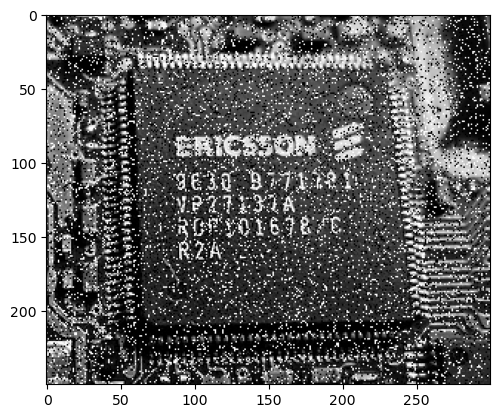

In [46]:
plt.imshow(noisy_img[50:300, 300:600], cmap='gray', vmin=0, vmax=1)

Note: the implementation above gives a preference to pepper noise, since it's possible for salt pixels to be overwritten as pepper (but not the reverse). Instead, let's use a single random array, but select select different subintervals between `0` and `1` to identify salt/pepper noise:

In [47]:
noisy_img = gray_img.copy()

nrows, ncols = noisy_img.shape

random_array = np.random.random((nrows, ncols))

for i in range(nrows):
    for j in range(ncols):
        if random_array[i,j] < .1:
            noisy_img[i,j] = 1
        if random_array[i,j] > .9:
            noisy_img[i,j] = 0

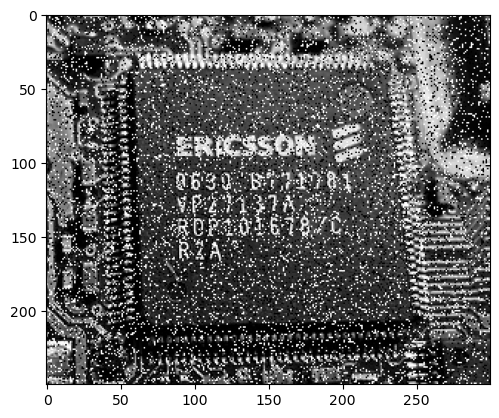

In [49]:
plt.imshow(noisy_img[50:300, 300:600], cmap='gray', vmin=0, vmax=1)

**Note.** In the example code above, we iterated through every row and column and decided for each entry whether or not to add salt and pepper noise. This is perfect case to use Boolean arrays:

Idea: create a `salt_mask` Boolean array containing `True` in each entry that we wish to hit with salt noise. That is, `salt_mask` should contain `True` everywhere that the `random_array` is less than, say, `0.1`.

In [53]:
noisy_img = gray_img.copy()

nrows, ncols = noisy_img.shape

random_array = np.random.random((nrows, ncols))

salt_mask = random_array < .1
pepper_mask = random_array > .9

noisy_img[salt_mask] = 1
noisy_img[pepper_mask] = 0

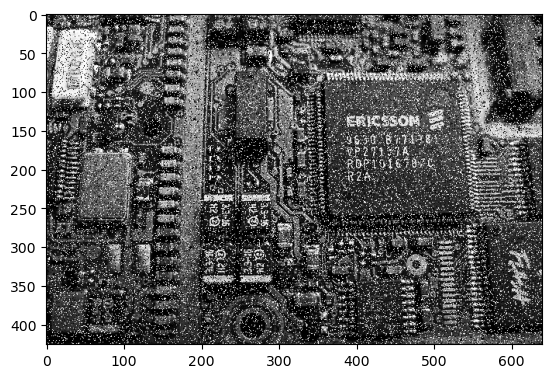

In [54]:
plt.imshow(noisy_img, cmap='gray', vmin=0, vmax=1)

**Exercise.** Use the above sample code to write a function `sp_noise(img, noise)` that adds salt and pepper noise to an image. Its first argument img should be a 2-dimensional numpy array representing the image and the second argument noise should be the fraction of pixels that are to be replaced by noise (for example, with noise = 0.05 about 5% of pixels should be noise, consisting in roughly equal parts of white and black pixels). The function should return a 2-dimensional numpy array representing the original image with noise added.

### The mean and median filters

A description of the mean filter is provided on the [project page](https://jllottes.github.io/Projects/image_denoising/image_denoising.html). Now that we have a noisy image, let's try to apply the mean filter.

- For right now, we will use a `3` by `3` grid centered centered at each pixel to compute the mean.
- For right now, we will ignore all pixels at the edges of the image.

Again, let's make a copy `filtered_img` of the noisy array that we will filter so that we do not modify the noisy array.

In [ ]:
filtered_img = noisy_img.copy()

If we are considering the pixel in the `i`th row and `j`th column (i.e. `noisy_img[i,j]`, we want a `3` by `3` slice centered on the `[i,j]`th pixel. That is, we want a slice that includes the `i-1`, `i`, and `i+1` rows and the `j-1`, `j`, and `j+1` columns.

What about the median filter? The `np.median` function will compute the median of an array.

## Thoughts on Tartans

In [63]:
total_width = 102
vertical_stripes = np.zeros((total_width, total_width, 3), dtype=int)

In [65]:
vertical_stripes[:,0:14] = (52, 80, 100)
vertical_stripes[:,14:20] = (16, 16, 16)
vertical_stripes[:,20:26] = (52, 80, 100)
vertical_stripes[:,26:32] = (16, 16, 16)
vertical_stripes[:,32:38] = (52, 80, 100)
vertical_stripes[:,38:70] = (16, 16, 16)
vertical_stripes[:,70:102] = (92, 100, 40)

#plt.imshow(vertical_stripes)

In [66]:
B = [52, 80, 100]
K = [16, 16, 16]
OG = [92, 100, 40]

colors = [B, K, B, K, B, K, OG]
widths = [14, 6, 6, 6, 6, 32, 32]

In [69]:
stripe_start = 0
for color, width in zip(colors, widths):
    vertical_stripes[:, stripe_start : stripe_start + width] = color
    stripe_start = stripe_start + width

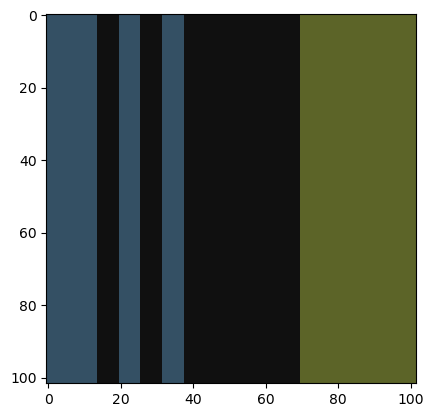

In [70]:
plt.imshow(vertical_stripes)

In [71]:
actual_tartan = plt.imread('campbell_sample4.png')

In [72]:
print(actual_tartan.shape)

(440, 440, 4)


In [73]:
print(actual_tartan.dtype)

float32


In [74]:
print(actual_tartan[0,0])

[0.20392157 0.3137255  0.39215687 1.        ]


In [75]:
actual_tartan = (255 * actual_tartan[:,:,:3]).astype(int)

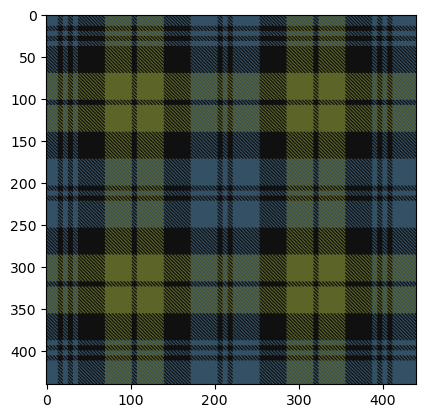

In [76]:
plt.imshow(actual_tartan)

In [86]:
tartan = actual_tartan.copy()
tartan = tartan + (255 * (np.random.random(tartan.shape) -.5)/20).astype(int)

In [87]:
np.max(np.abs(tartan - actual_tartan))

np.int64(6)

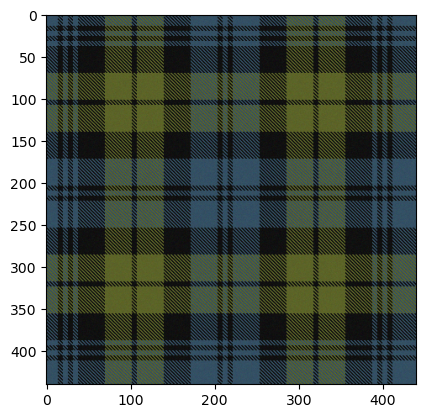

In [88]:
plt.imshow(tartan)

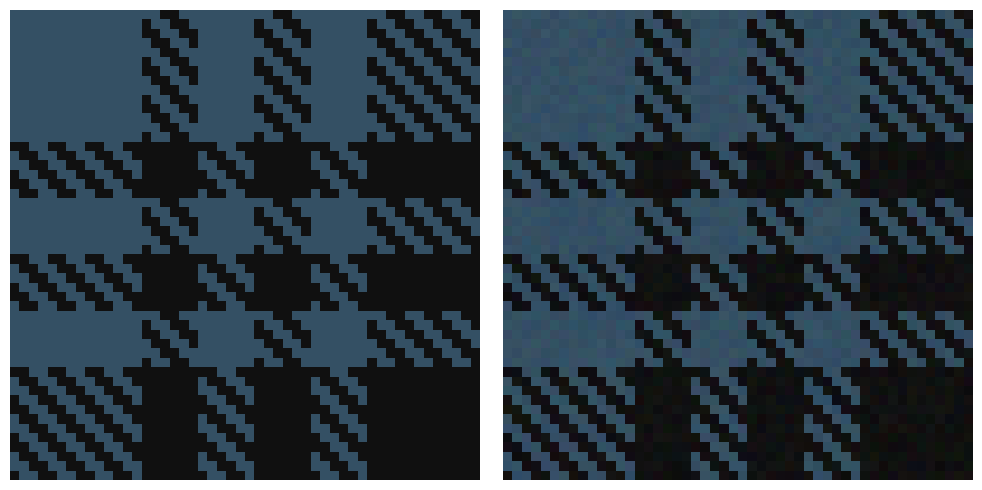

In [90]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(actual_tartan[:50, :50])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tartan[:50, :50])
plt.axis('off')

plt.tight_layout()

In [92]:
difference = np.mean(np.abs(tartan - actual_tartan), axis=2)

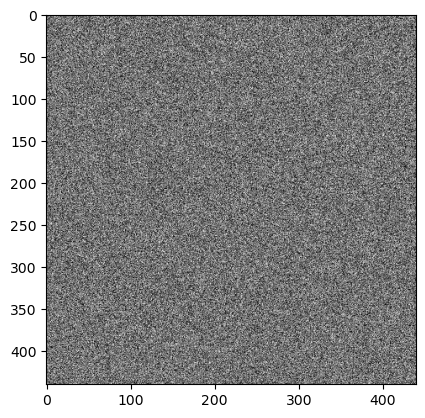

In [94]:
plt.imshow(difference, cmap='gray')

In [98]:
N = 1000

colors = [B, K, B, K, B, K, OG]
widths = [14, 6, 6, 6, 6, 32, 32]

total_width = sum(widths)
while total_width < N:
    widths = widths + widths
    colors = colors + colors
    total_width = sum(widths)

In [100]:
sum(widths)

1632

In [ ]:
tartan[:N, :N]